# QUESTION 1 Linear regression with one explanatory variable    


# Q 1 A

Slope: 0.09324142754349982
Intercept: 0.0040478376866624555
R-squared: 0.0007049713034502618
P-value: 0.6409049000031647
Standard error: 0.19970586443555416
Correlation: 0.02655129570190995


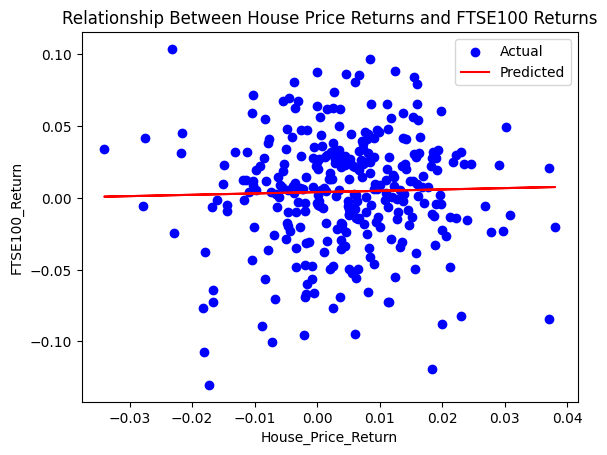

In [19]:
 # Importing the necessary libraries
import pandas as pd # for data manipulation
import seaborn as sns # for data visualization
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.linear_model import LinearRegression # for linear regression
import matplotlib.pyplot as plt # for plotting
import scipy.stats as stats # for statistical tests
import numpy as np # for numerical operations
# Loading monthly average house price data 
house_prices = pd.read_excel('Monthly.xls') 

# Loading FTSE100 data from CSV
ftse100 = pd.read_csv('FTSE100.csv') 

# renaming unnamed column from unnamed: 0 to Date
house_prices.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

#  filtering average house price
house_prices = house_prices[['Date', 'Average House Price']]

# filtering data from 1991 to 2016
house_prices_filtered = house_prices[(house_prices['Date'] >= '1991-01-01') & (house_prices['Date'] <= '2016-12-31')]

ftse100['Date'] = pd.to_datetime(ftse100['Date'])

# filtering adjusted close
filtered_ftse100 = ftse100[['Date', 'Adj Close']]

# filtering data from 1991 to 2016
filtered_ftse100 = filtered_ftse100[(filtered_ftse100['Date'] >= '1991-01-01') & (filtered_ftse100['Date'] <= '2016-12-31')]
# sorting data by date
filtered_ftse100 = filtered_ftse100.sort_values(by='Date')

# Calculating annualized return
monthly_returns = house_prices_filtered['Average House Price'].pct_change().dropna()
monthly_returns_ftse = filtered_ftse100['Adj Close'].pct_change().dropna()

# explanatory and dependent variables
X =monthly_returns
y = monthly_returns_ftse

# creating regression model  by using linregress
slope , intercept, r_value, p_value, std_err = stats.linregress(X, y)

# print the results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard error:", std_err)

# plot actual and predcted values on scatter plot
# predict values using the regression model
y_pred = intercept + slope * X
# calculate coefficient between dependent and explanatory variables
correlation = np.corrcoef(X, y)[0, 1]
print("Correlation:", correlation)

# plot actual and predicted values
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.title('Relationship Between House Price Returns and FTSE100 Returns')
plt.xlabel('House_Price_Return')
plt.ylabel('FTSE100_Return')
plt.legend()
plt.show()




# Q1 C 
Null hypothesis : There is no significant relationship between the house price return and the FTSE100 return.

Alternative Hypothesis : There is a significant relationship between the house price return and the FTSE100 return.

In [18]:
# Set the significance level (alpha)
alpha = 0.05

# Decision-making based on p-value
if p_value < alpha:
    print("Reject the null hypothesis (H₀). There is a statistically significant relationship between house price returns and FTSE100 returns.")
else:
    print("Fail to reject the null hypothesis (H₀). There is no statistically significant relationship between house price returns and FTSE100 returns.")


Fail to reject the null hypothesis (H₀). There is no statistically significant relationship between house price returns and FTSE100 returns.


# QUESTION 2
## Linear regression with multiple explanatory variable

In [23]:
# importing necessary libraries
import pandas as pd #for data manipulation
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Loading the dataset 
college_df = pd.read_csv('College.csv')
# selecting the relevant columns which are received applications , number of enrolled students, the number of admitted students who were in the top 10% and number of admitted students who
# were in the top 25% of their class to predict graduation rate

variables_of_interest = ['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc', 'Grad.Rate']

# Calculating correlation coefficients
correlation_matrix = college_df[variables_of_interest].corr()
print(correlation_matrix['Grad.Rate'])
# Plotting the correlation matrix





Apps         0.146755
Enroll      -0.022341
Outstate     0.571290
Top10perc    0.494989
Top25perc    0.477281
Grad.Rate    1.000000
Name: Grad.Rate, dtype: float64


# 2b  Perform stepwise linear regression on the independent variables

# Forward selection


In [24]:
import statsmodels.api as sm
import pandas as pd

# Define predictor variables and the dependent variable
X = college_df[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc']]
y = college_df['Grad.Rate']
# Define the forward regression function
def forward_regression(X, y, threshold_in=0.05):
    """Perform a forward feature selection based on p-value from statsmodels.api.OLS"""

    # Initialize variables
    initial_features = []
    remaining_features = list(X.columns)
    selected_features = []

    while remaining_features:
        # Create a dictionary to store p-values of remaining features
        pvals = pd.Series(index=remaining_features)

        for feature in remaining_features:
            # Fit the model with the current set of initial features + the feature in consideration
            model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit()
            pvals[feature] = model.pvalues[feature]
        
        # Get the feature with the lowest p-value
        min_p_value = pvals.min()

        # If the p-value is less than the threshold, add the feature to the model
        if min_p_value < threshold_in:
            best_feature = pvals.idxmin()
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            selected_features.append(best_feature)
            print(f"Adding {best_feature} with p-value {min_p_value:.4f}")
        else:
            break

    return selected_features



# Perform forward regression
selected_features = forward_regression(X, y)

# Print the selected features
print("Selected features after forward regression:")
print(selected_features)

# Fit the final model using the selected features
X_selected = sm.add_constant(X[selected_features])
final_model = sm.OLS(y, X_selected).fit()
# print coefficient and slope
print(final_model.params)


# Print the summary of the final model
print(final_model.summary())






Adding Outstate with p-value 0.0000
Adding Top25perc with p-value 0.0000
Selected features after forward regression:
['Outstate', 'Top25perc']
const        33.085969
Outstate      0.001896
Top25perc     0.225474
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Grad.Rate   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     235.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.82e-80
Time:                        09:25:18   Log-Likelihood:                -3127.2
No. Observations:                 777   AIC:                             6260.
Df Residuals:                     774   BIC:                             6274.
Df Model:                           2                                         
Covariance Type:            nonrobust                         

# 2d Use BIC to select the model, based on the given independent variables

In [26]:


def forward_selection(X, y):
    initial_features = X.columns.tolist()
    best_features = []
    best_bic = float('inf')

    while initial_features:
        bic_values = []
        for feature in initial_features:
            # Fit the model with the current set of features
            model = sm.OLS(y, sm.add_constant(X[best_features + [feature]])).fit()
            bic_values.append(model.bic)
        
        # Find the feature with the minimum BIC
        min_bic_index = bic_values.index(min(bic_values))
        min_bic = bic_values[min_bic_index]

        # If the best BIC improves, add that feature
        if min_bic < best_bic:
            best_bic = min_bic
            best_features.append(initial_features[min_bic_index])
            # Remove the feature that was just added from the initial features
            initial_features.remove(initial_features[min_bic_index])
        else:
            break  # Stop if no improvement in BIC

    return best_features, best_bic

# Run forward selection
selected_features_bic, final_bic = forward_selection(X, y)

# Display the results
print("Selected features based on BIC:")
print(selected_features_bic)
print(f"Final BIC value: {final_bic}")

# Fit the final model with the selected features
final_model_bic = sm.OLS(y, sm.add_constant(X[selected_features_bic])).fit()
# print coefficients and slope
print("\nFinal Model Coefficients:")
print(final_model_bic.params)
print("\nFinal Model Slope:")
print(final_model_bic.params[1])
print("\nFinal Model Summary:")
print(final_model_bic.summary())



Selected features based on BIC:
['Outstate', 'Top25perc']
Final BIC value: 6274.3329824422635

Final Model Coefficients:
const        33.085969
Outstate      0.001896
Top25perc     0.225474
dtype: float64

Final Model Slope:
0.0018961105550138614

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:              Grad.Rate   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     235.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.82e-80
Time:                        10:03:39   Log-Likelihood:                -3127.2
No. Observations:                 777   AIC:                             6260.
Df Residuals:                     774   BIC:                             6274.
Df Model:                           2                                         
Covariance Type:    

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_19888\1427263377.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(final_model_bic.params[1])


# Accuracy of the model 

In [9]:
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your dataset
college_df = pd.read_csv('College.csv')

# Define the dependent variable and independent variables (all features)
y = college_df['Grad.Rate']
X_full = college_df[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc']]

# Fit the model using all five features
full_model = sm.OLS(y, sm.add_constant(X_full)).fit()

# Calculate metrics for the full model
full_r_squared = full_model.rsquared
full_adjusted_r_squared = full_model.rsquared_adj
full_predictions = full_model.predict(sm.add_constant(X_full))
full_mse = mean_squared_error(y, full_predictions)
full_mae = mean_absolute_error(y, full_predictions)
full_rmse = mean_squared_error(y, full_predictions, squared=False)

print("Full Model Metrics:")
print(f"R-squared: {full_r_squared:.4f}")
print(f"Adjusted R-squared: {full_adjusted_r_squared:.4f}")
print(f"Mean Squared Error (MSE): {full_mse:.4f}")
print(f"Mean Absolute Error (MAE): {full_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {full_rmse:.4f}")

# Define the selected useful predictors
X_selected = college_df[['Outstate', 'Top25perc']]

# Fit the final model using the selected features
final_model = sm.OLS(y, sm.add_constant(X_selected)).fit()

# Calculate metrics for the selected model
selected_r_squared = final_model.rsquared
selected_adjusted_r_squared = final_model.rsquared_adj
selected_predictions = final_model.predict(sm.add_constant(X_selected))
selected_mse = mean_squared_error(y, selected_predictions)
selected_mae = mean_absolute_error(y, selected_predictions)
selected_rmse = mean_squared_error(y, selected_predictions, squared=False)

print("\nSelected Model Metrics:")
print(f"R-squared: {selected_r_squared:.4f}")
print(f"Adjusted R-squared: {selected_adjusted_r_squared:.4f}")
print(f"Mean Squared Error (MSE): {selected_mse:.4f}")
print(f"Mean Absolute Error (MAE): {selected_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {selected_rmse:.4f}")

# Compare the accuracies
print("\nComparison of Model Accuracies:")
print("Full Model Metrics:")
print(f"R-squared: {full_r_squared:.4f} | Adjusted R-squared: {full_adjusted_r_squared:.4f} | MSE: {full_mse:.4f} | MAE: {full_mae:.4f} | RMSE: {full_rmse:.4f}")

print("Selected Model Metrics:")
print(f"R-squared: {selected_r_squared:.4f} | Adjusted R-squared: {selected_adjusted_r_squared:.4f} | MSE: {selected_mse:.4f} | MAE: {selected_mae:.4f} | RMSE: {selected_rmse:.4f}")


Full Model Metrics:
R-squared: 0.3862
Adjusted R-squared: 0.3822
Mean Squared Error (MSE): 180.8955
Mean Absolute Error (MAE): 10.2508
Root Mean Squared Error (RMSE): 13.4497

Selected Model Metrics:
R-squared: 0.3778
Adjusted R-squared: 0.3762
Mean Squared Error (MSE): 183.3691
Mean Absolute Error (MAE): 10.3235
Root Mean Squared Error (RMSE): 13.5414

Comparison of Model Accuracies:
Full Model Metrics:
R-squared: 0.3862 | Adjusted R-squared: 0.3822 | MSE: 180.8955 | MAE: 10.2508 | RMSE: 13.4497
Selected Model Metrics:
R-squared: 0.3778 | Adjusted R-squared: 0.3762 | MSE: 183.3691 | MAE: 10.3235 | RMSE: 13.5414


c:\Users\STUDENT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\STUDENT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Compare Accuracy of BIC vs Stepwise Model (with useful variables)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Get the number of observations (n) and predictors (p)
n = X.shape[0]  # Number of samples
p_stepwise = len(selected_features)  # Number of predictors for Stepwise model
p_bic = len(selected_features_bic)  # Number of predictors for BIC model (replace with your BIC-selected features)

# Predict using the Stepwise Model (useful variables from stepwise selection)
y_pred_stepwise = final_model.predict(sm.add_constant(X[selected_features]))  # Stepwise model uses 'selected_features'

# Predict using the BIC Model (useful variables from BIC selection)
y_pred_bic = final_model_bic.predict(sm.add_constant(X[selected_features_bic]))  # BIC model uses 'selected_features_bic'

# Calculate metrics for Stepwise Model (useful variables)
mse_stepwise = mean_squared_error(y, y_pred_stepwise)
rmse_stepwise = np.sqrt(mse_stepwise)
r2_stepwise = r2_score(y, y_pred_stepwise)
mape_stepwise = mean_absolute_percentage_error(y, y_pred_stepwise)

# Calculate Adjusted R² for Stepwise Model
adj_r2_stepwise = 1 - (1 - r2_stepwise) * (n - 1) / (n - p_stepwise - 1)

# Calculate metrics for BIC Model (useful variables)
mse_bic = mean_squared_error(y, y_pred_bic)
rmse_bic = np.sqrt(mse_bic)
r2_bic = r2_score(y, y_pred_bic)
mape_bic = mean_absolute_percentage_error(y, y_pred_bic)

# Calculate Adjusted R² for BIC Model
adj_r2_bic = 1 - (1 - r2_bic) * (n - 1) / (n - p_bic - 1)

# Print results for Stepwise Model (useful variables)
print("Stepwise Model (Useful Variables):")
print(f"MSE: {mse_stepwise:.4f}")
print(f"RMSE: {rmse_stepwise:.4f}")
print(f"R²: {r2_stepwise:.4f}")
print(f"Adjusted R²: {adj_r2_stepwise:.4f}")
print(f"MAPE: {mape_stepwise:.4f}")

# Print results for BIC Model (useful variables)
print("\nBIC Model (Useful Variables):")
print(f"MSE: {mse_bic:.4f}")
print(f"RMSE: {rmse_bic:.4f}")
print(f"R²: {r2_bic:.4f}")
print(f"Adjusted R²: {adj_r2_bic:.4f}")
print(f"MAPE: {mape_bic:.4f}")


Stepwise Model (Useful Variables):
MSE: 183.3691
RMSE: 13.5414
R²: 0.3778
Adjusted R²: 0.3762
MAPE: 0.1921

BIC Model (Useful Variables):
MSE: 183.3691
RMSE: 13.5414
R²: 0.3778
Adjusted R²: 0.3762
MAPE: 0.1921


# Compute Accuracy of Chosen Model (Five Predictor Variables vs Useful Variables)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np



# Step 1: Fit the model with **all five predictor variables**
X_all = sm.add_constant(X)  # Using all predictor variables
model_all = sm.OLS(y, X_all).fit()

# Step 2: Predict using the model with all variables
y_pred_all = model_all.predict(X_all)

# Calculate metrics for the model with all predictor variables
mse_all = mean_squared_error(y, y_pred_all)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y, y_pred_all)
mape_all = mean_absolute_percentage_error(y, y_pred_all)

# Calculate Adjusted R² for the model with all variables
p_all = X.shape[1]  # Number of predictors for the model with all variables
adj_r2_all = 1 - (1 - r2_all) * (n - 1) / (n - p_all - 1)

# Step 3: Fit the model with only **useful variables**
X_useful = sm.add_constant(X[selected_features])  # Using useful predictor variables
model_useful = sm.OLS(y, X_useful).fit()

# Step 4: Predict using the model with useful variables
y_pred_useful = model_useful.predict(X_useful)

# Calculate metrics for the model with useful predictor variables
mse_useful = mean_squared_error(y, y_pred_useful)
rmse_useful = np.sqrt(mse_useful)
r2_useful = r2_score(y, y_pred_useful)
mape_useful = mean_absolute_percentage_error(y, y_pred_useful)

# Calculate Adjusted R² for the model with useful variables
p_useful = len(selected_features)  # Number of predictors for the model with useful variables
adj_r2_useful = 1 - (1 - r2_useful) * (n - 1) / (n - p_useful - 1)

# Print results for the model with all variables
print("Model (All Variables):")
print(f"MSE: {mse_all:.4f}")
print(f"RMSE: {rmse_all:.4f}")
print(f"R²: {r2_all:.4f}")
print(f"Adjusted R²: {adj_r2_all:.4f}")
print(f"MAPE: {mape_all:.4f}")

# Print results for the model with only useful variables
print("\nModel (Useful Variables):")
print(f"MSE: {mse_useful:.4f}")
print(f"RMSE: {rmse_useful:.4f}")
print(f"R²: {r2_useful:.4f}")
print(f"Adjusted R²: {adj_r2_useful:.4f}")
print(f"MAPE: {mape_useful:.4f}")


Model (All Variables):
MSE: 180.8955
RMSE: 13.4497
R²: 0.3862
Adjusted R²: 0.3814
MAPE: 0.1905

Model (Useful Variables):
MSE: 183.3691
RMSE: 13.5414
R²: 0.3778
Adjusted R²: 0.3762
MAPE: 0.1921


# f

In [43]:
import pandas as pd
import statsmodels.api as sm



# Step 2: Fit the model with all predictor variables
X = sm.add_constant(X)  # Adding constant for intercept
model_all = sm.OLS(y, X).fit()  # Fit model


cmu_data = {
    'Apps': 8728,         
    'Enroll': 1191,       
    'Outstate': 17900,    
    'Top10perc': 60,      
    'Top25perc': 89        
}

# Step 3: Convert to DataFrame
cmu_df = pd.DataFrame([cmu_data])
X_cmu = sm.add_constant(cmu_df, has_constant='add')

# Check if the constant was added
print(X_cmu)

# Step 6: Predict the graduation rate using the fitted model
graduation_rate_prediction = model_all.predict(X_cmu)

# Step 7: Output the predicted graduation rate
print(f"Predicted Graduation Rate for CMU: {graduation_rate_prediction[0]:.2f}%")


   const  Apps  Enroll  Outstate  Top10perc  Top25perc
0    1.0  8728    1191     17900         60         89
Predicted Graduation Rate for CMU: 89.20%


# QUESTION 3 , I WILL GET BACK TO YOU 

MAPE for the prediction in 2021: 18.50%


c:\Users\STUDENT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


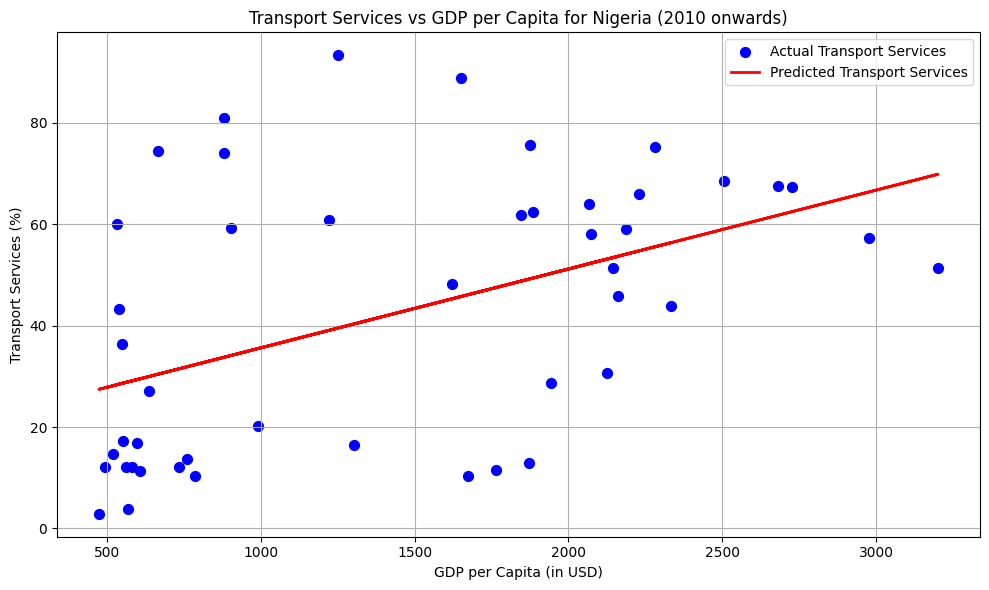

Predicted transport services for Nigeria in 2021: 52.21%
Correlation between GDP per Capita and Transport Services: 0.47

Model Summary:
                             OLS Regression Results                            
Dep. Variable:     Transport Services   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     12.71
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           0.000876
Time:                        14:57:47   Log-Likelihood:                -214.38
No. Observations:                  47   AIC:                             432.8
Df Residuals:                      45   BIC:                             436.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Step 1: Load the data
transport_services_df = pd.read_excel('API_TX.VAL.TRAN.ZS.WT_DS2_en_excel_v2_1404.xls', sheet_name='Data', skiprows=3)
gdp_per_capita_df = pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_31806.xls', sheet_name='Data', skiprows=3)

# Step 2: Filter data for Nigeria
Nigeria_transport_df = transport_services_df[transport_services_df['Country Name'] == 'Nigeria']
Nigeria_gdp_per_capita_df = gdp_per_capita_df[gdp_per_capita_df['Country Name'] == 'Nigeria']

# Step 3: Melt the data to long format
Nigeria_transport_melted = Nigeria_transport_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                                    var_name='Year', value_name='Transport Services')

Nigeria_gdp_per_capita_df_melted = Nigeria_gdp_per_capita_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                                           var_name='Year', value_name='GDP per Capita')

# Step 4: Clean the melted data
Nigeria_transport_melted = Nigeria_transport_melted[['Year', 'Transport Services']].dropna()
Nigeria_gdp_per_capita_df_melted = Nigeria_gdp_per_capita_df_melted[['Year', 'GDP per Capita']].dropna()

# Convert Year to numeric
Nigeria_transport_melted['Year'] = pd.to_numeric(Nigeria_transport_melted['Year'])
Nigeria_gdp_per_capita_df_melted['Year'] = pd.to_numeric(Nigeria_gdp_per_capita_df_melted['Year'])


# Step 6: Merge the two datasets based on the Year column
merged_data = pd.merge(Nigeria_transport_melted, Nigeria_gdp_per_capita_df_melted, on='Year')

# Step 7: Linear Regression using 'GDP per Capita' to predict 'Transport Services'
# Prepare the independent variable (GDP per Capita) and the dependent variable (Transport Services)
X = merged_data[['GDP per Capita']]
y = merged_data['Transport Services']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 8: Predict the transport services for the GDP per capita value for 2021
# Get the GDP per capita value for 2021
gdp_per_capita_2021 = Nigeria_gdp_per_capita_df_melted[Nigeria_gdp_per_capita_df_melted['Year'] == 2021]['GDP per Capita'].values[0]

# Prepare the input for the prediction
predicted_transport_2021 = model.predict([[gdp_per_capita_2021]])

# Step 9: Calculate correlation
correlation = merged_data['GDP per Capita'].corr(merged_data['Transport Services'])

# Step 10: Model summary using statsmodels
X_sm = sm.add_constant(X)  # Adding a constant for the intercept
sm_model = sm.OLS(y, X_sm).fit()
model_summary = sm_model.summary()

# Step 11: Calculate MAPE if actual transport services for 2021 is available
actual_transport_2021 = Nigeria_transport_melted[Nigeria_transport_melted['Year'] == 2021]['Transport Services'].values
actual_transport_2021 = actual_transport_2021[0]
mape = abs((actual_transport_2021 - predicted_transport_2021[0]) / actual_transport_2021) * 100
print(f"MAPE for the prediction in 2021: {mape:.2f}%")


# Step 12: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['GDP per Capita'], merged_data['Transport Services'], color='blue', label='Actual Transport Services', s=50)
plt.plot(merged_data['GDP per Capita'], sm_model.predict(X_sm), color='red', label='Predicted Transport Services', linewidth=2)
plt.title('Transport Services vs GDP per Capita for Nigeria (2010 onwards)')
plt.xlabel('GDP per Capita (in USD)')
plt.ylabel('Transport Services (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 13: Print predicted transport services for 2021
print(f"Predicted transport services for Nigeria in 2021: {predicted_transport_2021[0]:.2f}%")
print(f"Correlation between GDP per Capita and Transport Services: {correlation:.2f}")
print("\nModel Summary:\n", model_summary)

# Print MAPE



# Step 14: Set hypotheses
print("\nHypothesis Testing:")
# Null Hypothesis (H₀): The coefficient of GDP per Capita = 0
# Alternative Hypothesis (H₁): The coefficient of GDP per Capita ≠ 0

# Check the p-value for the GDP per Capita coefficient
p_value_gdp = sm_model.pvalues['GDP per Capita']
significance_level = 0.05  # Common significance level

if p_value_gdp < significance_level:
    print("Reject H₀: There is a significant effect of GDP per Capita on Transport Services.")
else:
    print("Fail to reject H₀: There is no significant effect of GDP per Capita on Transport Services.")

# Print the p-value 
print(f"P-value for the GDP per Capita coefficient: {p_value_gdp:.4f}")


# QUESTION 4

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 1: Load the dataset
data = pd.read_csv('Israeli_Unemployment_Rate.csv')

# Step 2: Process the data
data['Date'] = pd.to_datetime(data['Date'])
data = data[(data['Date'] >= '1980-01-01') & (data['Date'] <= '2013-12-31')]
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Step 3: Fit the linear regression model
X = data['Date_ordinal'].values.reshape(-1, 1)
y = data['Value'].values

model = LinearRegression()
model.fit(X, y)

# Step 4: Predict the unemployment rate for 2020
year_2020 = pd.to_datetime('2020-12-31').toordinal()
predicted_value_2020 = model.predict([[year_2020]])
print(f'Predicted unemployment rate for 2020: {predicted_value_2020[0]:.2f}')

# Step 5: Evaluate the performance of the model using MAPE
years_to_evaluate = np.arange(1998, 2014)
predicted_values = []

for year in years_to_evaluate:
    year_ordinal = pd.to_datetime(f'{year}-12-31').toordinal()
    predicted_value = model.predict([[year_ordinal]])[0]
    predicted_values.append(predicted_value)

actual_values = data.loc[data['Date'].dt.year.isin(years_to_evaluate), 'Value'].values
absolute_percentage_errors = np.abs((actual_values - predicted_values) / actual_values) * 100
mape = np.mean(absolute_percentage_errors)

print(f'MAPE: {mape:.2f}%')


Predicted unemployment rate for 2020: 11.36
MAPE: 25.93%
